## Data Preparation

In [1]:
# Connect google drive on Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Install AutoGluon in the environment
!pip install -U pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 36.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [3]:
!pip install -U setuptools wheel

  Using cached setuptools-70.0.0-py3-none-any.whl.metadata (5.9 kB)
Using cached setuptools-70.0.0-py3-none-any.whl (863 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [4]:
# Install AutoGluon in the environment
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 25.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might ne

In [4]:
# Import all required modules and packages
from autogluon.tabular import TabularDataset, TabularPredictor
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_rows', 500)

In [5]:
# Define the directory path
dir_path = '/content/drive/MyDrive/Projets/Optimal_Functioning_(N=1066)'

In [6]:
# Change current directory to the selected directory path
os.chdir(dir_path)

In [7]:
# Import the raw data containing all the items
raw_data = pd.read_csv('./data/Base_1066_recodee_2017-06.txt', sep = '\s+', encoding='latin', na_values=999)

In [8]:
# check
raw_data.head(2)

,Id,Sexe,Age,Situfam,Enfant,Situpro,Typecontrat,Jourabsence,Revenus,Nivetude,Taillentrep,Manager,CSP1,CSP2,Secteur,CodePostal,ZoneFR1,ZoneFR2,MHCA1,MHCA2,MHCA3,MHCA4,MHCA5,MHCA6,MHCA7,MHCA8,MHCA9,MHCA10,MHCA11,MHCA12,MHCA13,MHCA14,MHCB1,MHCB2,MHCB3,MHCB4,MHCB5,MHCB6,MHCB7,MHCB8,MHCB9,MHCB10,MHCB11,MHCB12,MHCB13,MHCB14,MHCC1,MHCC2,MHCC3,MHCC4,MHCC5,MHCC6,MHCC7,MHCC8,MHCC9,MHCC10,MHCC11,MHCC12,MHCC13,MHCC14,PE1,PE2,PE3,PE4,PE5,PE6,PE7,PE8,PE9,PE10,PE11,PE12,PE13,PE14,PE15,PE16,PE17,PE18,PE19,PE20,Flux1,Flux2,Flux3,Flux4,Flux5,Flux6,Flux7,Flux8,Flux9,Flux10,Flux11,Flux12,Flux13,Cap1,Cap2,Cap3,AD1,AD2,AD3,AD4,AD5,AD6,AD7,AD8,AD9,AD10,EfP1,EfP2,EfP3,EfP4,EfP5,EfP6,EfP7,EfP8,UF1,UF2,UF3,UF4,UF5,UF6,HSE1,HSE2,HSE3,HSE4,HSE5,HSE6,HSE7,HSE8,HSE9,HSE10,HSE11,HSE12,HSE13,HSE14,HSE15,HSE16,HSE17,HSE18,HSE19,HSE20,HSE21,HSE22,HSE23,HSE24,HSE25,HSE26,HSE27,HSE28,HSE29,HSE30,HSE31,HSE32,HSE33,HSE34,HSE35,ALQ1,ALQ2,ALQ3,ALQ4,ALQ5,ALQ6,ALQ7,ALQ8,ALQ9,ALQ10,ALQ11,ALQ12,ALQ13,ALQ14,ALQ15,ALQ16,abs1,abs2,abs3,abs4,abs5,abs6,abs7,abs8,abs9,abs10,abs11,Imp1,Imp2,Imp3,Imp4,Imp5,Imp6,Force1,Force2,Force3,Force4,Force5,Force6,Force7,Force8,Force9,Force10,Force11,Force12,Force13,Force14,Force15,Force16,Force17,Force18,Force19,Force20,Force21,Force22,Force23,Force24,DÃ.marche,ExperDP,PratDP,cabs1,cabs2,cabs3,cabs4,cabs5,cabs6,cabs7
0,303,2,43,1,1,2,6,1.0,2,2,1,1,5,56,11,69008.0,5,8,6.0,5.0,5.0,NaN,1.0,NaN,NaN,NaN,5.0,5.0,5.0,6.0,6.0,6.0,6.0,5.0,5.0,1.0,1.0,1.0,5.0,NaN,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,4.0,NaN,NaN,4.0,1.0,1.0,NaN,6.0,5.0,2.0,6.0,NaN,6.0,5.0,5.0,5.0,NaN,NaN,5.0,2.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,NaN,5.0,1.0,NaN,4,7,4,5.0,5.0,6.0,5.0,6.0,5.0,4.0,5.0,6.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,6.0,6.0,NaN,5.0,5.0,5.0,3.0,5.0,3.0,3.0,NaN,4.0,3.0,4.0,5.0,3.0,NaN,5.0,5.0,3.0,NaN,5.0,3.0,2.0,5.0,NaN,4.0,NaN,5.0,NaN,5.0,3.0,4.0,5.0,3.0,3.0,4.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180,180,0,0,0,0,0,3.0,3.0,2.0,2.0,3.0,3.0,1.0,1.0,4.0,1.0,9.0,9.0,9.0,9.0,9.0,9.0,8.0,9.0,8.0,9.0,9.0,8.0,8.0,8.0,9.0,5.0,8.0,8.0,8.0,9.0,9.0,9.0,8.0,9.0,2,NaN,NaN,7,10,0,0,0,0,0
1,864,1,56,2,2,2,1,1.0,3,2,1,1,6,63,5,47240.0,4,7,1.0,2.0,1.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,2.0,2.0,3.0,1.0,1.0,3.0,3.0,2.0,1.0,3.0,2.0,2.0,2.0,3.0,2.0,1.0,4.0,1.0,1.0,4.0,3.0,3.0,3.0,4.0,4.0,2.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,5.0,6.0,1.0,6.0,1.0,1.0,6.0,2.0,2.0,5.0,2.0,1.0,1.0,5.0,3.0,5.0,6.0,4,3,4,4.0,2.0,1.0,3.0,3.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,4.0,4.0,1.0,1.0,5.0,4.0,3.0,4.0,1.0,4.0,1.0,1.0,2.0,1.0,4.0,2.0,4.0,2.0,3.0,4.0,4.0,3.0,1.0,3.0,4.0,5.0,1.0,1.0,1.0,2.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144,144,0,0,0,0,0,5.0,3.0,5.0,4.0,3.0,4.0,2.0,2.0,4.0,2.0,5.0,5.0,5.0,5.0,6.0,4.0,7.0,7.0,5.0,4.0,4.0,5.0,8.0,4.0,6.0,8.0,7.0,8.0,6.0,3.0,6.0,7.0,4.0,3.0,2,NaN,NaN,7,10,0,0,0,0,0


In [9]:
# replace variables to be consistent with previous research
raw_data.rename(columns={'Jourabsence':'GenAbs','cabs7':'ManAbs','cabs1':'PhysPres','cabs2':'PsycPres','abs8':'Turnover','abs10':'Unhappy'}, inplace=True)

In [10]:
# import the items vs factors data of the Factor Structure (ESEM) putting the non target to zero
factors_data = pd.read_csv('./data/factors_sheet.csv', index_col='ITEMS')

In [11]:
# check
factors_data.info()
factors_data

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, PE11 to UF6
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FOP       32 non-null     float64
 1   POSEM     32 non-null     float64
 2   NEGEM     32 non-null     float64
 3   FLOW      32 non-null     float64
 4   SELFDET   32 non-null     float64
 5   PERSEFF   32 non-null     float64
 6   STRENGTH  32 non-null     float64
dtypes: float64(7)
memory usage: 2.0+ KB


,FOP,POSEM,NEGEM,FLOW,SELFDET,PERSEFF,STRENGTH
ITEMS,,,,,,,
PE11,0.527,0.584,0.000,0.000,0.000,0.000,0.000
PE13,0.509,0.487,0.000,0.000,0.000,0.000,0.000
PE14,0.547,0.654,0.000,0.000,0.000,0.000,0.000
PE16,0.625,0.497,0.000,0.000,0.000,0.000,0.000
PE19,0.531,0.563,0.000,0.000,0.000,0.000,0.000
PE3,-0.248,0.000,0.705,0.000,0.000,0.000,0.000
PE5,-0.158,0.000,0.788,0.000,0.000,0.000,0.000
PE6,-0.199,0.000,0.812,0.000,0.000,0.000,0.000
PE10,-0.200,0.000,0.691,0.000,0.000,0.000,0.000


In [12]:
list(factors_data.index)

['PE11',
 'PE13',
 'PE14',
 'PE16',
 'PE19',
 'PE3',
 'PE5',
 'PE6',
 'PE10',
 'PE17',
 'Flux2',
 'Flux5',
 'Flux6',
 'Flux7',
 'Flux8',
 'AD2',
 'AD3',
 'AD4',
 'AD5',
 'AD6',
 'AD8',
 'AD9',
 'AD10',
 'EfP2',
 'EfP3',
 'EfP6',
 'EfP7',
 'EfP8',
 'UF2',
 'UF3',
 'UF4',
 'UF6']

In [13]:
# generate a dataframe (matrix) of respondents with only the factor structure items as columns
items_data = raw_data.loc[:, list(factors_data.index)]

In [14]:
# impute missing values with KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputed = imputer.fit_transform(items_data)

In [15]:
# put back in a dataframe
items_data = pd.DataFrame(imputed, columns=imputer.get_feature_names_out())
items_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PE11    1066 non-null   float64
 1   PE13    1066 non-null   float64
 2   PE14    1066 non-null   float64
 3   PE16    1066 non-null   float64
 4   PE19    1066 non-null   float64
 5   PE3     1066 non-null   float64
 6   PE5     1066 non-null   float64
 7   PE6     1066 non-null   float64
 8   PE10    1066 non-null   float64
 9   PE17    1066 non-null   float64
 10  Flux2   1066 non-null   float64
 11  Flux5   1066 non-null   float64
 12  Flux6   1066 non-null   float64
 13  Flux7   1066 non-null   float64
 14  Flux8   1066 non-null   float64
 15  AD2     1066 non-null   float64
 16  AD3     1066 non-null   float64
 17  AD4     1066 non-null   float64
 18  AD5     1066 non-null   float64
 19  AD6     1066 non-null   float64
 20  AD8     1066 non-null   float64
 21  AD9     1066 non-null   float64
 22  

In [16]:
# generate a dataframe with the dot product of the [respondents, items] matrix with the [items, factors] = [respondent, composite factors]
composite_data = items_data.dot(factors_data)

In [17]:
# add Id column for merging later
composite_data['Id'] = raw_data['Id']

In [18]:
# check
composite_data.info()
composite_data.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FOP       1066 non-null   float64
 1   POSEM     1066 non-null   float64
 2   NEGEM     1066 non-null   float64
 3   FLOW      1066 non-null   float64
 4   SELFDET   1066 non-null   float64
 5   PERSEFF   1066 non-null   float64
 6   STRENGTH  1066 non-null   float64
 7   Id        1066 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 66.8 KB


,FOP,POSEM,NEGEM,FLOW,SELFDET,PERSEFF,STRENGTH,Id
0,81.7194,14.996,5.082,16.782,24.033,12.359,11.691,303
1,26.9010,3.759,6.131,5.885,8.236,2.882,6.571,864


In [19]:
# now merge the raw data with factor score data
data = pd.merge(raw_data, composite_data, on='Id')

In [20]:
# check
data.info()
data.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 229 columns):
 #    Column       Non-Null Count  Dtype  
---   ------       --------------  -----  
 0    Id           1066 non-null   int64  
 1    Sexe         1066 non-null   int64  
 2    Age          1066 non-null   int64  
 3    Situfam      1066 non-null   int64  
 4    Enfant       1066 non-null   int64  
 5    Situpro      1066 non-null   int64  
 6    Typecontrat  1066 non-null   int64  
 7    GenAbs       1065 non-null   float64
 8    Revenus      1066 non-null   int64  
 9    Nivetude     1066 non-null   int64  
 10   Taillentrep  1066 non-null   int64  
 11   Manager      1066 non-null   int64  
 12   CSP1         1066 non-null   int64  
 13   CSP2         1066 non-null   int64  
 14   Secteur      1066 non-null   int64  
 15   CodePostal   1062 non-null   float64
 16   ZoneFR1      1066 non-null   int64  
 17   ZoneFR2      1066 non-null   int64  
 18   MHCA1        1054 non-null

,Id,Sexe,Age,Situfam,Enfant,Situpro,Typecontrat,GenAbs,Revenus,Nivetude,Taillentrep,Manager,CSP1,CSP2,Secteur,CodePostal,ZoneFR1,ZoneFR2,MHCA1,MHCA2,MHCA3,MHCA4,MHCA5,MHCA6,MHCA7,MHCA8,MHCA9,MHCA10,MHCA11,MHCA12,MHCA13,MHCA14,MHCB1,MHCB2,MHCB3,MHCB4,MHCB5,MHCB6,MHCB7,MHCB8,MHCB9,MHCB10,MHCB11,MHCB12,MHCB13,MHCB14,MHCC1,MHCC2,MHCC3,MHCC4,MHCC5,MHCC6,MHCC7,MHCC8,MHCC9,MHCC10,MHCC11,MHCC12,MHCC13,MHCC14,PE1,PE2,PE3,PE4,PE5,PE6,PE7,PE8,PE9,PE10,PE11,PE12,PE13,PE14,PE15,PE16,PE17,PE18,PE19,PE20,Flux1,Flux2,Flux3,Flux4,Flux5,Flux6,Flux7,Flux8,Flux9,Flux10,Flux11,Flux12,Flux13,Cap1,Cap2,Cap3,AD1,AD2,AD3,AD4,AD5,AD6,AD7,AD8,AD9,AD10,EfP1,EfP2,EfP3,EfP4,EfP5,EfP6,EfP7,EfP8,UF1,UF2,UF3,UF4,UF5,UF6,HSE1,HSE2,HSE3,HSE4,HSE5,HSE6,HSE7,HSE8,HSE9,HSE10,HSE11,HSE12,HSE13,HSE14,HSE15,HSE16,HSE17,HSE18,HSE19,HSE20,HSE21,HSE22,HSE23,HSE24,HSE25,HSE26,HSE27,HSE28,HSE29,HSE30,HSE31,HSE32,HSE33,HSE34,HSE35,ALQ1,ALQ2,ALQ3,ALQ4,ALQ5,ALQ6,ALQ7,ALQ8,ALQ9,ALQ10,ALQ11,ALQ12,ALQ13,ALQ14,ALQ15,ALQ16,abs1,abs2,abs3,abs4,abs5,abs6,abs7,Turnover,abs9,Unhappy,abs11,Imp1,Imp2,Imp3,Imp4,Imp5,Imp6,Force1,Force2,Force3,Force4,Force5,Force6,Force7,Force8,Force9,Force10,Force11,Force12,Force13,Force14,Force15,Force16,Force17,Force18,Force19,Force20,Force21,Force22,Force23,Force24,DÃ.marche,ExperDP,PratDP,PhysPres,PsycPres,cabs3,cabs4,cabs5,cabs6,ManAbs,FOP,POSEM,NEGEM,FLOW,SELFDET,PERSEFF,STRENGTH
0,303,2,43,1,1,2,6,1.0,2,2,1,1,5,56,11,69008.0,5,8,6.0,5.0,5.0,NaN,1.0,NaN,NaN,NaN,5.0,5.0,5.0,6.0,6.0,6.0,6.0,5.0,5.0,1.0,1.0,1.0,5.0,NaN,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,4.0,NaN,NaN,4.0,1.0,1.0,NaN,6.0,5.0,2.0,6.0,NaN,6.0,5.0,5.0,5.0,NaN,NaN,5.0,2.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,NaN,5.0,1.0,NaN,4,7,4,5.0,5.0,6.0,5.0,6.0,5.0,4.0,5.0,6.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,6.0,6.0,NaN,5.0,5.0,5.0,3.0,5.0,3.0,3.0,NaN,4.0,3.0,4.0,5.0,3.0,NaN,5.0,5.0,3.0,NaN,5.0,3.0,2.0,5.0,NaN,4.0,NaN,5.0,NaN,5.0,3.0,4.0,5.0,3.0,3.0,4.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180,180,0,0,0,0,0,3.0,3.0,2.0,2.0,3.0,3.0,1.0,1.0,4.0,1.0,9.0,9.0,9.0,9.0,9.0,9.0,8.0,9.0,8.0,9.0,9.0,8.0,8.0,8.0,9.0,5.0,8.0,8.0,8.0,9.0,9.0,9.0,8.0,9.0,2,NaN,NaN,7,10,0,0,0,0,0,81.7194,14.996,5.082,16.782,24.033,12.359,11.691
1,864,1,56,2,2,2,1,1.0,3,2,1,1,6,63,5,47240.0,4,7,1.0,2.0,1.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,2.0,2.0,3.0,1.0,1.0,3.0,3.0,2.0,1.0,3.0,2.0,2.0,2.0,3.0,2.0,1.0,4.0,1.0,1.0,4.0,3.0,3.0,3.0,4.0,4.0,2.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,5.0,6.0,1.0,6.0,1.0,1.0,6.0,2.0,2.0,5.0,2.0,1.0,1.0,5.0,3.0,5.0,6.0,4,3,4,4.0,2.0,1.0,3.0,3.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,4.0,4.0,1.0,1.0,5.0,4.0,3.0,4.0,1.0,4.0,1.0,1.0,2.0,1.0,4.0,2.0,4.0,2.0,3.0,4.0,4.0,3.0,1.0,3.0,4.0,5.0,1.0,1.0,1.0,2.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144,144,0,0,0,0,0,5.0,3.0,5.0,4.0,3.0,4.0,2.0,2.0,4.0,2.0,5.0,5.0,5.0,5.0,6.0,4.0,7.0,7.0,5.0,4.0,4.0,5.0,8.0,4.0,6.0,8.0,7.0,8.0,6.0,3.0,6.0,7.0,4.0,3.0,2,NaN,NaN,7,10,0,0,0,0,0,26.9010,3.759,6.131,5.885,8.236,2.882,6.571


In [21]:
# import the data with the factors scores, the probability and the FOP class
var_names = ['FOP','POSEM','NEGEM','FLOW','SELFDET','PERSEFF','STRENGTH','CPROB1','CPROB2','CPROB3','CPROB4','CL_FOP','ID']
clfop_data = pd.read_csv('./data/Bi_ESEM_FOP_4cl_free.dat', sep='\s+', header = None, names=var_names )

In [22]:
# this to allow the possibility to compare quality of prediction with or wihout factor scores
'''
Set this variable True if you want to include the factor scores
'''
include_factor_scores = False

In [23]:
# define the columns of the factor score data with the raw data
if include_factor_scores:
  clfop_df = clfop_data.drop(columns=['CPROB1','CPROB2','CPROB3','CPROB4'])
else:
  clfop_df = clfop_data[['ID','CL_FOP']]

In [24]:
# now merge the raw data with factor score data
data = pd.merge(data, clfop_df, left_on='Id',right_on='ID').drop(columns='ID')

In [25]:
# check the number of missing values
col_miss = data.isnull().sum()
col_miss

Id               0
Sexe             0
Age              0
Situfam          0
Enfant           0
Situpro          0
Typecontrat      0
GenAbs           1
Revenus          0
Nivetude         0
Taillentrep      0
Manager          0
CSP1             0
CSP2             0
Secteur          0
CodePostal       4
ZoneFR1          0
ZoneFR2          0
MHCA1           12
MHCA2            7
MHCA3           15
MHCA4           84
MHCA5           33
MHCA6           92
MHCA7           64
MHCA8           66
MHCA9           29
MHCA10          13
MHCA11          14
MHCA12          38
MHCA13          11
MHCA14          38
MHCB1           22
MHCB2           15
MHCB3           14
MHCB4           82
MHCB5           49
MHCB6          109
MHCB7           56
MHCB8           70
MHCB9           37
MHCB10          16
MHCB11          17
MHCB12          43
MHCB13          11
MHCB14          40
MHCC1            8
MHCC2            7
MHCC3           10
MHCC4          111
MHCC5           40
MHCC6          103
MHCC7       

In [26]:
# select for removal those variable that have more than 50% missing values
to_drop = data.columns[col_miss > 0.5*len(data)]

In [27]:
# drop those columns with more than 50% missing values
data = data.drop(columns = to_drop)

In [28]:
# check
data.isnull().sum()

Id               0
Sexe             0
Age              0
Situfam          0
Enfant           0
Situpro          0
Typecontrat      0
GenAbs           1
Revenus          0
Nivetude         0
Taillentrep      0
Manager          0
CSP1             0
CSP2             0
Secteur          0
CodePostal       4
ZoneFR1          0
ZoneFR2          0
MHCA1           12
MHCA2            7
MHCA3           15
MHCA4           84
MHCA5           33
MHCA6           92
MHCA7           64
MHCA8           66
MHCA9           29
MHCA10          13
MHCA11          14
MHCA12          38
MHCA13          11
MHCA14          38
MHCB1           22
MHCB2           15
MHCB3           14
MHCB4           82
MHCB5           49
MHCB6          109
MHCB7           56
MHCB8           70
MHCB9           37
MHCB10          16
MHCB11          17
MHCB12          43
MHCB13          11
MHCB14          40
MHCC1            8
MHCC2            7
MHCC3           10
MHCC4          111
MHCC5           40
MHCC6          103
MHCC7       

## Recode Categorical Variables

In [29]:
# Recode the Demarche Column
data.rename(columns={'DÃ.marche':'Demarche'}, inplace=True)
data.columns[196]

'Demarche'

In [30]:
# recoding all categorical variables

data['Sexe'].replace({1:"Masculin",2:"Féminin"}, inplace=True)
data['Situfam'].replace({1:"Vit seul(e)", 2:"Vit en couple"}, inplace=True)
data['Situpro'].replace({1:"Indépendant", 2:"Salarié", 5:"En transition"}, inplace=True)
data['Revenus'].replace({1:'moins de 6000€', 2:'entre 6000€ et 11900€', 3:'entre 11901€ et 26490€', 4:'entre 26491€ et 70900€', 5:'entre 70901€ et 150000€', 6:'plus de 150001€'}, inplace=True)
data['Nivetude'].replace({1:'sans diplôme ou brevet de collège', 2: 'CAP/BEP', 3:'Baccalauréat', 4:'Bac+2 / +3', 5:'Bac+4 / Bac+5', 6:'Doctorat'}, inplace=True)
data['Taillentrep'].replace({1:"TPE (Moins de 10 salariés)",
                                 2:"Petite PME-PMI (Entre 10 et 49 salariés)",
                                 3:"Moyenne PME-PMI (Entre 50  et 199  salariés)",
                                 4:"Grande PME-PMI (Entre 200 et 499 salariés)",
                                 5:"Entreprise de Taille Intermédiaire (Entre 500 et 2000 salariés)",
                                 6:"Grands Groupes (Plus de 2000 salariés)"},inplace=True)
data['Manager'].replace({1:"Non", 2:"Manager intermédiaire ", 3:"Manager supérieur", 4:"Chef d'Entreprise"},inplace=True)
data['CSP1'].replace({1:"Agriculteurs",
                          2:"Artisans, commerçants et chefs d'entreprises",
                          3:"Cadres, professions intellectuelles supérieures et professions libérales",
                          4:"Professions intermédiaires",
                          5:"Employés",
                          6:"Ouvriers"},inplace=True)
data['CSP2'].replace({10:"Agriculteurs",
                          21:"Artisans",
                          22:"Commerçants et assimilés",
                          23:"Chefs d'entreprise de 10 salariés ou plus",
                          31:"Professions libérales",
                          33:"Cadres de la fonction publique",
                          34:"Professeurs, professions scientifiques",
                          35:"Professions de l'information, des arts et des spectacles",
                          37:"Cadres administratifs et commerciaux d'entreprises",
                          38:"Ingénieurs et cadres techniques d'entreprises",
                          42:"Professeurs des écoles, instituteurs et professions assimilées",
                          43:"Professions intermédiaires de la santé et du travail social",
                          44:"Clergé, religieux",
                          45:"Professions intermédiaires administratives de la fonction publique",
                          46:"Professions intermédiaires administratives et commerciales des entreprises",
                          47:"Techniciens (sauf techniciens tertiaires)",
                          48:"Contremaîtres, agents de maîtrise (maîtrise administrative exclue)",
                          52:"Employés civils et agents de service de la fonction publique",
                          53:"Agents de surveillance",
                          54:"Employés administratifs d'entreprise",
                          55:"Employés de commerce",
                          56:"Personnels des services directs aux particuliers",
                          62:"Ouvriers qualifiés de type industriel",
                          63:"Ouvriers qualifiés de type artisanal",
                          64:"Chauffeurs",
                          65:"Ouvriers qualifiés de la manutention, du magasinage et du transport",
                          67:"Ouvriers non qualifiés de type industriel",
                          68:"Ouvriers non qualifiés de type artisanal",
                          69:"Ouvriers agricoles et assimilés"}, inplace=True)
data['Secteur'].replace({1:"Industrie",
                             2:"Construction",
                             3:"Commerce et réparation",
                             4:"Transports et entreposages",
                             5:"Hébergement et restauration",
                             6:"Information et communication",
                             7:"Activités financières et d’assurance",
                             8:"Activités immobilières",
                             9:"Soutien aux entreprises",
                             10:"Enseignement, santé et action sociale",
                             11:"Services aux ménages",
                             12:"Autre"},inplace=True)
data['CL_FOP'].replace({1.0:"Fully Dysfunctioning",2.0:"Emotionally Functioning",3.0:"Self-Motivated Functioning",4.0:"Resilient Dysfunctioning"}, inplace=True)
data['ZoneFR1'].replace({0:np.nan,1:'Ile de France',2:'Nord-Ouest',3:'Nord Est',4:'Sud-Ouest',5:'Sud Est'}, inplace=True)
data['ZoneFR2'].replace({0:np.nan,1:'Ile de France',2:'Banlieue Parisienne Ouest',3:'Ouest',4:'Nord',5:'Est',6:'Banlieue Parisienne Est',7:'Sud-Ouest',8:'Centre Est',9:'Méditerranée'},inplace=True)
data['Typecontrat'].replace({1:'Temps plein contrat 35h', 2:'Temps plein forfait', 3:'Mi-temps contrat 35h', 4:'Mi-temps forfait', 5:'Durée hébdomadaire', 6:'Je ne sais pas'} ,inplace=True)
data['Demarche'].replace({1:'Oui', 2:'Non'},inplace=True)

In [31]:
# get ready for Machine Learning : remove the ID and Postal Code variables
df = data.drop(columns=['Id','CodePostal'])

In [32]:
# define the outcome
outcome = 'CL_FOP'

In [33]:
# generate train and test data
train_data, test_data = train_test_split(df, test_size=0.2, stratify=data[outcome], random_state=0)

In [34]:
path_to_model_data = "./composite_models_data"
presets = "good_quality"

In [35]:
# fit AutoGluon's tabular predictor
try:
  predictor = TabularPredictor.load(path_to_model_data)
except:
  predictor = TabularPredictor(label=outcome, path=path_to_model_data).fit(train_data, presets=presets)

This means that the predictor was fit in a version `<=0.3.1`.
Presets specified: ['good_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~8x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the data size.
	You can avoid this risk by setting `save_bag_folds=True`.
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-f

In [36]:
# check the first predicted classes
y_pred = predictor.predict(test_data)
y_pred.head()  # Predictions

908    Self-Motivated Functioning
708      Resilient Dysfunctioning
959          Fully Dysfunctioning
163    Self-Motivated Functioning
86       Resilient Dysfunctioning
Name: CL_FOP, dtype: object

In [37]:
# check the first predicted probabilities
y_pred_proba = predictor.predict_proba(test_data)
y_pred_proba.head()  # Prediction Probabilities

,Emotionally Functioning,Fully Dysfunctioning,Resilient Dysfunctioning,Self-Motivated Functioning
908,0.000052,0.000254,0.021937,0.977756
708,0.000185,0.001498,0.989466,0.008850
959,0.000016,0.998266,0.001054,0.000664
163,0.002377,0.002481,0.128574,0.866568
86,0.000153,0.009377,0.989603,0.000867


In [38]:
# evaluate performance on test data
predictor.evaluate(test_data)

{'accuracy': 0.8364485981308412,
 'balanced_accuracy': 0.7374608150470219,
 'mcc': 0.7594285471768736}

In [39]:
# check the leaderboard
predictor.leaderboard(test_data)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesGini_BAG_L2_FULL,0.855140,NaN,accuracy,0.862145,NaN,23.658421,0.108860,0.155790,0.820573,2,True,43
1,ExtraTreesEntr_BAG_L2_FULL,0.850467,NaN,accuracy,0.856636,NaN,23.641977,0.103351,0.143208,0.804129,2,True,44
2,RandomForestGini_BAG_L2_FULL,0.845794,NaN,accuracy,0.852823,NaN,23.726066,0.099537,0.144140,0.888218,2,True,40
3,LightGBM_BAG_L1_FULL,0.836449,NaN,accuracy,0.021014,NaN,0.865440,0.021014,NaN,0.865440,1,True,27
4,WeightedEnsemble_L3_FULL,0.836449,NaN,accuracy,0.024003,NaN,1.165735,0.002989,NaN,0.300295,3,True,48
5,WeightedEnsemble_L2_FULL,0.836449,NaN,accuracy,0.024546,NaN,1.024671,0.003532,NaN,0.159231,2,True,36
6,XGBoost_BAG_L2_FULL,0.836449,NaN,accuracy,0.776298,NaN,23.113306,0.023013,NaN,0.275458,2,True,45
7,LightGBMXT_BAG_L2_FULL,0.836449,NaN,accuracy,0.792199,NaN,23.267053,0.038914,NaN,0.429205,2,True,38
8,RandomForestEntr_BAG_L2_FULL,0.836449,NaN,accuracy,0.851463,NaN,23.690244,0.098178,0.153839,0.852396,2,True,41
9,LightGBMLarge_BAG_L1_FULL,0.831776,NaN,accuracy,0.065587,NaN,3.515727,0.065587,NaN,3.515727,1,True,35


In [40]:
# generate feature importance dataframe
importance = predictor.feature_importance(test_data)

Computing feature importance via permutation shuffling for 209 features using 214 rows with 5 shuffle sets...
	50.54s	= Expected runtime (10.11s per shuffle set)
	7.73s	= Actual runtime (Completed 5 of 5 shuffle sets)


In [41]:
# convert into percentage of the maximum importance value and sort
importance_percent = importance.sort_values(by='importance')/importance.max()*100

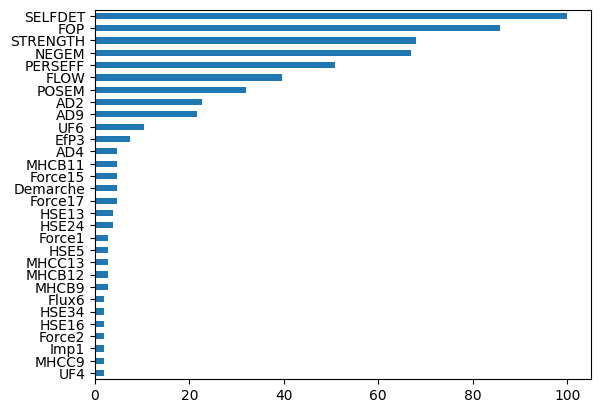

In [42]:
# plot the 30 highest importance values
importance_percent['importance'][-30:].plot(kind='barh')
plt.show()

In [43]:
# select only those feature for which importance is greater than 20% of the highest importance values
items_above_20_percent = importance_percent[importance_percent['importance'] > 20]

In [44]:
items_above_20_percent

,importance,stddev,p_value,n,p99_high,p99_low
AD9,21.698113,35.070593,0.123380,100.0,26.795092,10.879781
AD2,22.641509,41.367015,0.194170,100.0,29.434221,8.223986
POSEM,32.075472,100.000000,1.226982,100.0,54.487434,-15.493898
FLOW,39.622642,68.599434,0.159276,100.0,50.338139,16.879007
PERSEFF,50.943396,82.410217,0.123775,100.0,62.932015,25.497564
NEGEM,66.981132,19.347650,0.000144,100.0,55.246595,91.887678
STRENGTH,67.924528,53.237436,0.007581,100.0,66.410317,71.138441
FOP,85.849057,64.168895,0.006290,100.0,82.972211,91.955158
SELFDET,100.000000,85.593243,0.010713,100.0,100.000000,100.000000


In [45]:
# Make a copy of the DataFrame slice
items_above_20_percent_copy = items_above_20_percent.copy()

# Now rename the index on the copied DataFrame
items_above_20_percent_copy.rename(index={'AD9':'AD9 - Mes sentiments sont pris en considération au travail',
                                          'AD4': "AD4 - Je m'entends bien avec les collègues de travail",
                               'AD2':"AD2 - J'apprécie vraiment les personnes avec lesquelles je travaille",
                               'UF3':"UF3 - Je m'appuie sur mes forces les plus développées dans mon travail",
                                          'EfP3' : "EfP3 - C'est facile pour moi de me fixer sur mes objectifs et d'accomplir mes buts.",
                                          'PE10': "PE10 - (J'ai ressenti) de la haine ou de la méfiance ou de la suspicion",
                               'Flux6':"Flux6 - Je suis entièrement absorbé par ce que je fais",
                               'AD2':"AD2 - J'apprécie vraiment les personnes avec lesquelles je travaille",
                               'MHCA1':"MHCA1 - (Je suis) heureux",
                               'EfP8':"EfP8 - Peu importe ce qui arrive, généralement je suis capable d'y faire face",
                               'PE11':"PE1 - (Je suis) rassuré ou optimiste ou plein d’espoir",
                               'Flux5':"Flux5 - Mon esprit est tout à fait clair"}, inplace=True)

# Now you can use items_above_20_percent_copy without the error
items_above_20_percent_copy


,importance,stddev,p_value,n,p99_high,p99_low
AD9 - Mes sentiments sont pris en considération au travail,21.698113,35.070593,0.123380,100.0,26.795092,10.879781
AD2 - J'apprécie vraiment les personnes avec lesquelles je travaille,22.641509,41.367015,0.194170,100.0,29.434221,8.223986
POSEM,32.075472,100.000000,1.226982,100.0,54.487434,-15.493898
FLOW,39.622642,68.599434,0.159276,100.0,50.338139,16.879007
PERSEFF,50.943396,82.410217,0.123775,100.0,62.932015,25.497564
NEGEM,66.981132,19.347650,0.000144,100.0,55.246595,91.887678
STRENGTH,67.924528,53.237436,0.007581,100.0,66.410317,71.138441
FOP,85.849057,64.168895,0.006290,100.0,82.972211,91.955158
SELFDET,100.000000,85.593243,0.010713,100.0,100.000000,100.000000


In [46]:
# select the features above the 20% threshold
list(items_above_20_percent.index) + [outcome]

['AD9',
 'AD2',
 'POSEM',
 'FLOW',
 'PERSEFF',
 'NEGEM',
 'STRENGTH',
 'FOP',
 'SELFDET',
 'CL_FOP']

In [47]:
# create anew dataframe with only those features
df_simple = df.loc[:,list(items_above_20_percent.index) + [outcome]]
df_simple.info()
df_simple.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AD9       1055 non-null   float64
 1   AD2       1060 non-null   float64
 2   POSEM     1066 non-null   float64
 3   FLOW      1066 non-null   float64
 4   PERSEFF   1066 non-null   float64
 5   NEGEM     1066 non-null   float64
 6   STRENGTH  1066 non-null   float64
 7   FOP       1066 non-null   float64
 8   SELFDET   1066 non-null   float64
 9   CL_FOP    1066 non-null   object 
dtypes: float64(9), object(1)
memory usage: 83.4+ KB


,AD9,AD2,POSEM,FLOW,PERSEFF,NEGEM,STRENGTH,FOP,SELFDET,CL_FOP
0,6.0,5.0,14.996,16.782,12.359,5.0820,11.691,81.7194,24.033,Self-Motivated Functioning
1,1.0,2.0,3.759,5.885,2.882,6.1310,6.571,26.9010,8.236,Resilient Dysfunctioning
2,4.0,5.0,8.355,11.188,10.941,7.0750,8.464,55.5200,16.568,Fully Dysfunctioning
3,2.0,2.0,14.996,13.354,13.284,3.6230,12.696,69.2420,12.298,Resilient Dysfunctioning
4,6.0,1.0,11.377,11.704,8.646,8.3946,9.248,61.1924,18.290,Resilient Dysfunctioning


In [48]:
# split that simple dataframe into a training and test set
simple_train, simple_test = train_test_split(df_simple, test_size=0.2, stratify=df_simple[outcome], random_state=0)

In [49]:
path_to_model_simple = "./composite_models_simple"

In [50]:
# fit with TabularPredictor
try:
  simple_model = TabularPredictor.load(path_to_model_simple)
except:
  simple_model = TabularPredictor(label=outcome, path=path_to_model_simple).fit(simple_train, presets=presets)

This means that the predictor was fit in a version `<=0.3.1`.
Presets specified: ['good_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~8x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the data size.
	You can avoid this risk by setting `save_bag_folds=True`.
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-f

In [51]:
# Evaluate model
simple_model.evaluate(simple_test)

{'accuracy': 0.883177570093458,
 'balanced_accuracy': 0.8286311389759665,
 'mcc': 0.8287700511263153}

In [52]:
# Check the leaderboard on the test sample
lead_df = simple_model.leaderboard(simple_test)
lead_df

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2_FULL,0.883178,NaN,accuracy,0.171804,NaN,2.730568,0.005824,NaN,0.180456,2,True,24
1,LightGBM_BAG_L1_FULL,0.878505,NaN,accuracy,0.018887,NaN,0.513198,0.018887,NaN,0.513198,1,True,15
2,NeuralNetTorch_BAG_L1_FULL,0.869159,NaN,accuracy,0.013703,NaN,3.171052,0.013703,NaN,3.171052,1,True,22
3,LightGBMXT_BAG_L1_FULL,0.864486,NaN,accuracy,0.013908,NaN,0.401797,0.013908,NaN,0.401797,1,True,14
4,NeuralNetFastAI_BAG_L1_FULL,0.859813,NaN,accuracy,0.022933,NaN,0.736303,0.022933,NaN,0.736303,1,True,13
5,LightGBMLarge_BAG_L1_FULL,0.859813,NaN,accuracy,0.044095,NaN,1.395919,0.044095,NaN,1.395919,1,True,23
6,RandomForestEntr_BAG_L1,0.859813,0.803991,accuracy,0.098145,0.114698,0.766420,0.098145,0.114698,0.766420,1,True,5
7,RandomForestEntr_BAG_L1_FULL,0.859813,NaN,accuracy,0.113223,0.114698,0.766420,0.113223,0.114698,0.766420,1,True,17
8,ExtraTreesEntr_BAG_L1_FULL,0.855140,NaN,accuracy,0.093364,0.116112,0.750277,0.093364,0.116112,0.750277,1,True,20
9,ExtraTreesEntr_BAG_L1,0.855140,0.802817,accuracy,0.129570,0.116112,0.750277,0.129570,0.116112,0.750277,1,True,8


### Check the performance of the best model on the test set

In [53]:
# load the simple model trained through validation sets
predictor = TabularPredictor.load(path_to_model_simple)

In [54]:
# select the best model based on the test set
best_model = lead_df.loc[0, "model"]

In [55]:
# compute the predicted outcome by that best model
y_pred = predictor.predict(simple_test, best_model)

In [56]:
# define the original outcome
y_test = simple_test[outcome]

In [57]:
# compute the performance using accuracy, kappa scores, precision recall and F1 score (on 0.5 threshold)
from sklearn.metrics import accuracy_score, cohen_kappa_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

In [58]:
accuracy

0.883177570093458

In [59]:
kappa

0.8283495893223819

In [60]:
print(classification_report(y_test, y_pred))

                            precision    recall  f1-score   support

   Emotionally Functioning       0.78      0.64      0.70        11
      Fully Dysfunctioning       0.91      0.86      0.88        58
  Resilient Dysfunctioning       0.88      0.92      0.90        87
Self-Motivated Functioning       0.88      0.90      0.89        58

                  accuracy                           0.88       214
                 macro avg       0.86      0.83      0.84       214
              weighted avg       0.88      0.88      0.88       214

